procurement=közbeszerzés

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10
plt.rcParams["font.size"]=15
%matplotlib inline

import community
import networkx as nx


In [ ]:
community.

Reading the datafile.

In [2]:
df=pd.read_csv(
    "AllTenders.csv.gz",
    sep=",",
    skiprows=1,
    compression="gzip",
    low_memory=False,
    index_col=0)

In [3]:
from datetime import datetime

In [4]:
df[df.columns[4:7]]=df[df.columns[4:7]].apply(lambda row: [datetime.strptime(date,"%Y-%m-%d") for date in row], axis=1)

To create a new column for the year!

In [5]:
df['year']=df["bid_end_date"].apply(lambda x: x.year)

To create a new column for the list of bidders, and ther bids

In [6]:
df['bidders']=df[df.columns[33:174:4]].apply(lambda row: [x for x in row if pd.isnull(x)==False], axis=1)
df['bidders_lowest_bids']=df[df.columns[34:175:4]].apply(lambda row: [x for x in row if pd.isnull(x)==False], axis=1)
df['bidders_name']=df[df.columns[32:173:4]].apply(lambda row: [x for x in row if pd.isnull(x)==False], axis=1)

In [7]:
def fill_win_code(x):
    if pd.isnull(x['winner_code']) & ~pd.isnull(x['supplier_name']):
        return x['bidders'][x['bidders_name'].index(x['supplier_name'])]
    else:
        return x['winner_code']

In [8]:
df.winner_code=df.apply(fill_win_code, axis=1)

A glimpse into the datafile.

In [14]:
df.shape

(138335, 180)

In [302]:
df.head(20).transpose().head(12)

id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
procurring_entity_id,1,2,3,3,5,5,5,4,2,4,6,5,9,8,6,7,10,11,12,15
tender_type,ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი,ელექტრონული ტენდერი,ელექტრონული ტენდერი,გამარტივებული ელექტრონული ტენდერი
tender_registration_number,SPA130012785,SPA130012786,SPA130012787,SPA130012788,SPA130012781,SPA130012782,SPA130012783,SPA130012784,SPA130012777,SPA130012778,SPA130012779,SPA130012780,SPA130012770,SPA130012771,SPA130012773,SPA130012774,SPA130012766,SPA130012768,SPA130012767,SPA130012762
tender_status,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ტენდერი არ შედგა,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია,დასრულებულია უარყოფითი შედეგით,დასრულებულია უარყოფითი შედეგით,ხელშეკრულება დადებულია,ტენდერი არ შედგა,ხელშეკრულება დადებულია,ხელშეკრულება დადებულია
tender_announcement_date,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00,2013-06-11 00:00:00
bid_start_date,2013-06-28 00:00:00,2013-06-28 00:00:00,2013-06-13 00:00:00,2013-06-13 00:00:00,2013-06-12 00:00:00,2013-06-27 00:00:00,2013-06-12 00:00:00,2013-06-28 00:00:00,2013-06-12 00:00:00,2013-06-13 00:00:00,2013-06-27 00:00:00,2013-06-12 00:00:00,2013-06-13 00:00:00,2013-06-12 00:00:00,2013-06-27 00:00:00,2013-06-12 00:00:00,2013-06-12 00:00:00,2013-06-27 00:00:00,2013-06-27 00:00:00,2013-06-13 00:00:00
bid_end_date,2013-07-03 00:00:00,2013-07-03 00:00:00,2013-06-17 00:00:00,2013-06-17 00:00:00,2013-06-14 00:00:00,2013-07-02 00:00:00,2013-06-14 00:00:00,2013-07-03 00:00:00,2013-06-14 00:00:00,2013-06-17 00:00:00,2013-07-02 00:00:00,2013-06-14 00:00:00,2013-06-17 00:00:00,2013-06-14 00:00:00,2013-07-02 00:00:00,2013-06-14 00:00:00,2013-06-14 00:00:00,2013-07-02 00:00:00,2013-07-02 00:00:00,2013-06-17 00:00:00
estimated_value,22110,2870,4935,4947,2700,13120,1400,43573,1200,838,406037,1600,6355,5724,169750,6680,15140,6500,104080,37080
include_vat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpv_code_and_description,66500000 - სადაზღვევო და საპენსიო მომსახურებები,39200000 - ავეჯის აქსესუარები,22600000 - საღებავი,22500000 - საბეჭდი ფორმები ან ცილინდრები ან ბე...,79800000 - ბეჭდვა და მასთან დაკავშირებული მომს...,30200000 - კომპიუტერული მოწყობილობები და აქსეს...,50100000 - სატრანსპორტო საშუალებებისა და მათთა...,45400000 - შენობის დასრულების სამუშაოები,39200000 - ავეჯის აქსესუარები,"30100000 - საოფისე მანქანა-დანადგარები, აღჭურვ...",45200000 - მთლიანი ან ნაწილობრივი სამშენებლო ს...,34300000 - ნაწილები და აქსესუარები სატრანსპორტ...,45400000 - შენობის დასრულების სამუშაოები,"50300000 - პერსონალური კომპიუტერების, საოფისე ...",45200000 - მთლიანი ან ნაწილობრივი სამშენებლო ს...,60100000 - საავტომობილო ტრანსპორტიs მომსახურებები,38400000 - ფიზიკური მახასიათებლების კონტროლის ...,"30100000 - საოფისე მანქანა-დანადგარები, აღჭურვ...",18400000 - სპეციალური ტანსაცმელი და აქსესუარები,79300000 - ბაზრის კვლევა და ეკონომიკური კვლევა...


In [343]:
df.groupby('year').winner_code.count()

year
2010       86
2011    17078
2012    18847
2013    20373
2014    22121
2015    11069
Name: winner_code, dtype: int64

In [93]:
print min(df.tender_announcement_date)
print max(df.tender_announcement_date)

2010-12-23 00:00:00
2015-05-27 00:00:00


What are the column names? (There are 36 bidders, each of them has 4 columns: `name, id, lowest bid, black_or_white`.)

procurring_entity_id:

tender_type : 
    4 type: 
        Electronic Tender
        Simplified electronic tender
        Consolidated Tender
        Electronic procurement procedure
        
tender_registration_number:
    
tender_status:
    
tender_announcement_date:
    
* bid_start_date
* bid_end_date
* estimated_value
* include_vat
* cpv_code_and_description:
* offer_step
* guarantee_amount
* guarantee_period
* created_at
* updated_at
* dataset_id
* url_id
* num_bids
* num_bidders
* contract_value

currency:
    
winning_org_id
risk_indicators
procurer_name
supplier_name
sub_codes
inProgress
updated
is_new
procurer_code:
    
winner_code:
    The winner's code
number_of_amendments
bidder_0_name
bidder_0_id
bidder_0_lowest_bid
bidder_0_black_or_white

In [11]:
#print "\n".join(df.columns[0:37])

How many rows and columns are there in the dataframe?

In [94]:
df.shape

(138335, 176)

In [36]:
df.cpv_code_and_description.value_counts()

45200000 - მთლიანი ან ნაწილობრივი სამშენებლო სამუშაოები და სამოქალაქო მშენებლობის სამუშაოები                                                          11882
45400000 - შენობის დასრულების სამუშაოები                                                                                                               6567
30200000 - კომპიუტერული მოწყობილობები და აქსესუარები                                                                                                   6285
30100000 - საოფისე მანქანა-დანადგარები, აღჭურვილობა და საკანცელარიო ნივთები, კომპიუტერების, პრინტერებისა და ავეჯის გარდა                               4950
09100000 - საწვავი                                                                                                                                     4578
71300000 - საინჟინრო მომსახურებები                                                                                                                     4306
50100000 - სატრანსპორტო საშუალებებისა და მათთან დაკავშირებული მო

What are the unique tender types? And their number?

In [12]:
print "\n".join(df.tender_type.unique())
print df.groupby("tender_type").size()

ელექტრონული ტენდერი
გამარტივებული ელექტრონული ტენდერი
კონსოლიდირებული ტენდერი
შესყიდვის ელექტრონული პროცედურა
tender_type
გამარტივებული ელექტრონული ტენდერი    100478
ელექტრონული ტენდერი                   37322
კონსოლიდირებული ტენდერი                  57
შესყიდვის ელექტრონული პროცედურა         478
dtype: int64


In [64]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.tender_type.unique()))

Electronic Tender
Simplified electronic tender
Consolidated Tender
Electronic procurement procedure


What are the unique tender statuses?

In [30]:
print "\n".join(df.tender_status.unique())

ხელშეკრულება დადებულია
ტენდერი არ შედგა
დასრულებულია უარყოფითი შედეგით
ტენდერი შეწყვეტილია
გამარჯვებული გამოვლენილია
წინადადებების მიღება დასრულებულია
მიმდინარეობს ხელშეკრულების მომზადება
შერჩევა/შეფასება
ტენდერი გამოცხადებულია
წინადადებების მიღება დაწყებულია


In [65]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.tender_status.unique()))

Contract Awarded
No Bids
Contract
Tender canceled
Winner Identified
Bidding completed
Preparation of contract
Selection / Evaluation
Tender Announced
Bids started


Estimated value vs number of tenders

/home/bencs/.anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


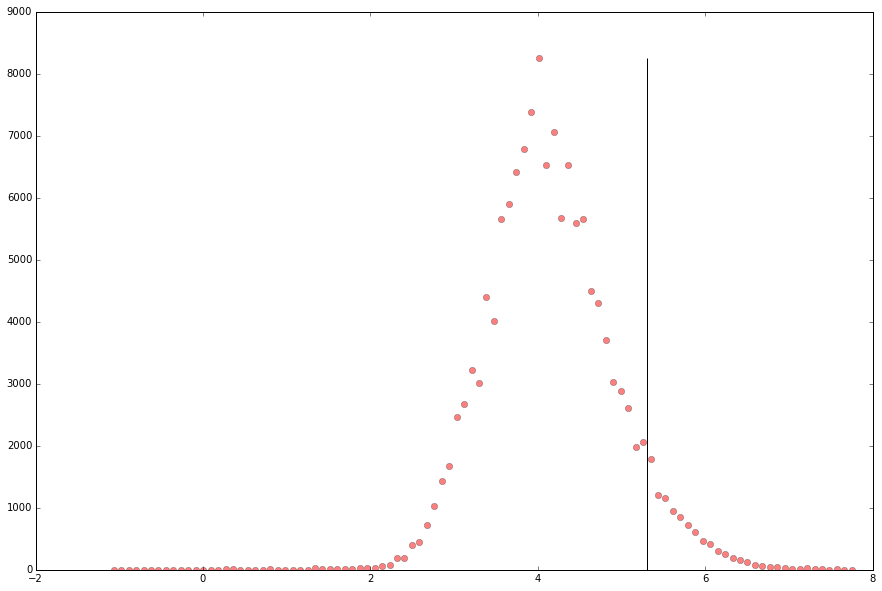

In [7]:
y,x=np.histogram(np.log10(np.array(df["estimated_value"])),bins=100)#.plot(kind="hist",bins=100,range=(0,300000),figsize=(15,10))
plt.figure(figsize=(15,10))
plt.plot(x[1:],y,'or',alpha=0.5)
plt.vlines(np.log10(2e5),0,np.max(y))
#plt.loglog()

#np.histogram(np.array(df.groupby("estimated_value").size()),bins=100)

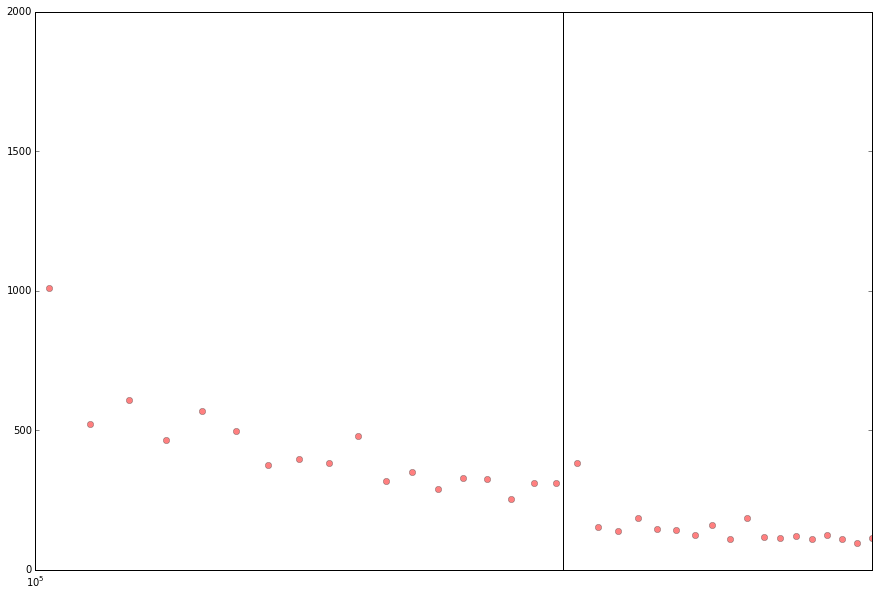

In [15]:
y,x=np.histogram(np.array(df["estimated_value"]),bins=10000)#.plot(kind="hist",bins=100,range=(0,300000),figsize=(15,10))
plt.figure(figsize=(15,10))
plt.plot(x[1:],y,'or',alpha=0.5)
plt.xlim([1e5,3e5])
plt.semilogx()
plt.ylim([0,2000])
plt.axvline(2e5,color='black')

#np.histogram(np.array(df.groupby("estimated_value").size()),bins=100)

Change in the list of companies (Jaccard index, Suprise winners, Suprise losers)

In [8]:
table_jac=df.groupby("year").bidders.sum()
table_jac=table_jac.apply(lambda x: pd.Series(x).unique().tolist())

In [10]:
s=list(table_jac.index)
print s
for x in range(len(table_jac)-1):
    i=len(np.intersect1d(table_jac.loc[s[x]],table_jac.loc[s[x+1]]))
    print s[x+1] , float(i)/(len(table_jac.loc[s[x]])+len(table_jac.loc[s[x+1]])-i)

[2010, 2011, 2012, 2013, 2014, 2015]
2011 0.0143090760425
2012 0.347136679334
2013 0.329970712659
2014 0.358867531484
2015 0.365495823517


http://tendermonitor.ge/en/tender/search?utf8=%E2%9C%93&supplier_name=&procurer_name=&tender_status=&cpvGroup=1&risk_indicator=&tender_type=&tender_registration_number=SPA120028982&commit=Search+Tenders&min_estimate=&announced_after=&keyword=&max_estimate=&announced_before=&cpv_code=&min_num_bids=&min_num_bidders=&max_num_bids=&max_num_bidders=

In [25]:
df[df.year==2012].head()[['tender_registration_number','url_id','winner_code','num_bidders','tender_status','bidder_0_id','bidder_0_lowest_bid','bidder_1_id','bidder_1_lowest_bid','bidder_2_id', 'bidder_3_id']]

,tender_registration_number,url_id,winner_code,num_bidders,tender_status,bidder_0_id,bidder_0_lowest_bid,bidder_1_id,bidder_1_lowest_bid,bidder_2_id,bidder_3_id
id,,,,,,,,,,,
12622,CON130000007,70902,NaN,2,გამარჯვებული გამოვლენილია,204876606,0,203841940,0.01,NaN,NaN
12629,SPA120028981,70895,404399664,1,ხელშეკრულება დადებულია,404399664,38250,NaN,NaN,NaN,NaN
12630,SPA120028982,70896,202157593,2,ხელშეკრულება დადებულია,202203123,26736,202157593,38413.00,NaN,NaN
12637,SPA120028975,70888,NaN,0,ტენდერი არ შედგა,NaN,NaN,NaN,NaN,NaN,NaN
12642,SPA120028965,70877,NaN,0,ტენდერი არ შედგა,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
table_s_win=df.groupby('year').winner_code.apply(lambda row: pd.Series([x for x in row if pd.isnull(x)==False]).value_counts())

ps_years=table_s_win.keys().get_level_values(0).unique()
print ps_years

winners=[np.array([x[1] for x in table_s_win.index if x[0]==y]) for y in ps_years]

[2010 2011 2012 2013 2014 2015]


In [31]:
t=5
winner_tres=[np.array([x[1] for x in table_s_win.index if x[0]==y and table_s_win[x]>t]) for y in ps_years]

In [32]:
print 'Suprise losers:'
for i in range(len(winner_tres)-1):
    print ps_years[i+1], float(len(winner_tres[i])-len(np.intersect1d(winners[i+1],winner_tres[i])))/(len(winner_tres[i]))

Suprise losers:
2011 0.0
2012 0.18776077886
2013 0.138676844784
2014 0.122911694511
2015 0.193932827736


In [14]:
print 'Suprise winners:'
for i in range(len(winner_tres)-1):
    print ps_years[i+1], float(len(np.intersect1d(np.setdiff1d(winners[i],winner_tres[i]),winner_tres[i+1])))/len(winners[i])

Suprise winners:
2011 0.588235294118
2012 0.0585134422773
2013 0.0535279805353
2014 0.0641854245598
2015 0.0164989939638


Check in a stable cpv-code market!

To create the weighted cobbider graph!

In [9]:
tdf=df[df.bidders.apply(lambda x: x!=[])][['tender_registration_number','bidders']]
tdf.columns=[0,1]

In [10]:
tdf=pd.DataFrame([\
tdf\
      .apply(lambda row: [row[0]]*len(row[1]),axis=1)\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist(),\
    tdf[1]\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist()\
 ]).transpose().set_index(0)

In [11]:
edgelist=tdf.join(tdf,lsuffix="x",rsuffix="y")
edgelist=edgelist[edgelist["1x"]<edgelist["1y"]]
edgelist=edgelist.groupby(["1x","1y"]).size()
edgelist=edgelist.reset_index()
edgelist.sort_values(by=0,ascending=False,inplace=True)
edgelist.columns=["s","t","w"]
edgelist.head(5)

,s,t,w
54688,202203123,203834075,331
108758,404873614,406058803,310
54705,202203123,211386695,225
54693,202203123,204927767,216
54414,202177205,401987329,205


In [12]:
G=nx.from_pandas_dataframe(edgelist,"s","t",["w"])

Simple parameters of the cobidder-graph.

In [147]:
G.number_of_nodes()

13340

In [148]:
G.number_of_edges()

120889

[]

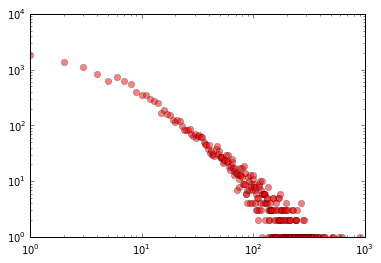

In [149]:
plt.plot(nx.degree_histogram(G),'ro',alpha=0.5)
plt.loglog()

In [150]:
nx.number_connected_components(G)

164

In [151]:
gc_list=list(nx.connected_component_subgraphs(G))

In [152]:
print [H.number_of_nodes() for H in gc_list]

[12946, 2, 2, 2, 2, 27, 5, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [16]:
partition = community.best_partition(G)

AttributeError: 'module' object has no attribute 'best_partition'

A 27 csoport milyen temaban van?

[199, 149, 116, 103, 82, 73, 69, 66, 55, 48, 44, 43, 42, 40, 39, 39, 38, 37, 34, 34, 32, 32, 32, 30, 30, 28, 28, 27, 27, 26]


/home/bencs/.anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/bencs/.anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


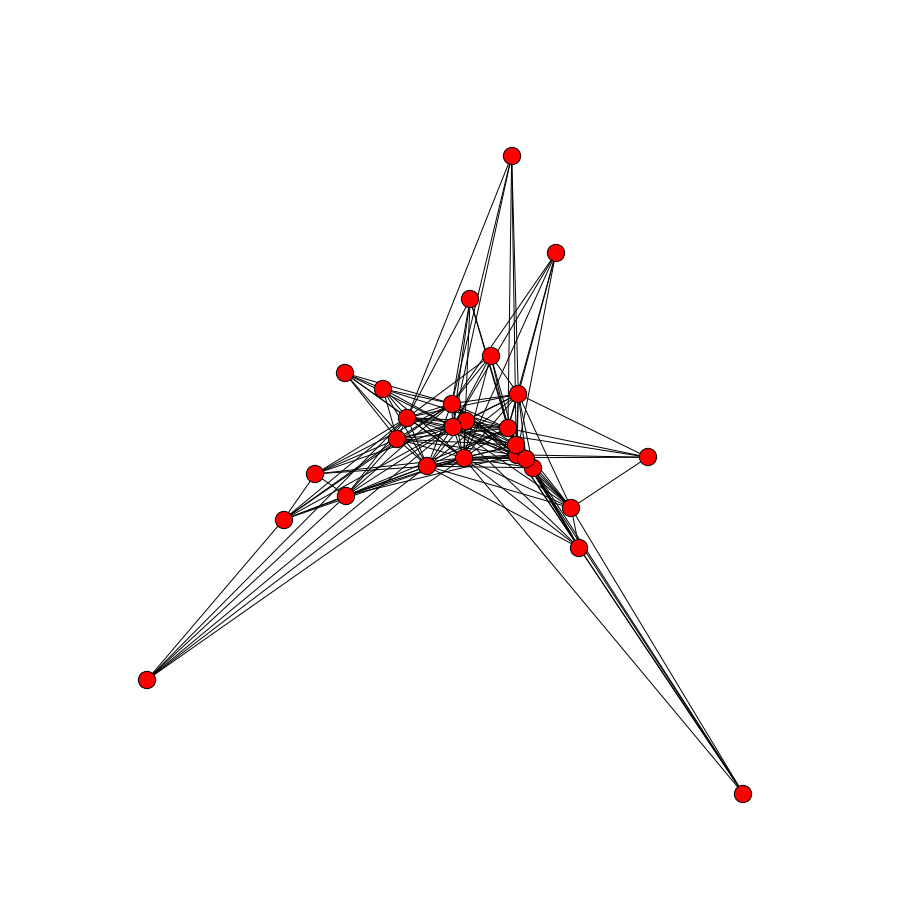

In [63]:
plt.figure(figsize=(12,12))

H=gc_list[5]
L=[ d['w'] for (u,v,d) in H.edges(data=True)]
L.sort(reverse=True)
print L[:30]
#nx.draw(H,width=[ d['w']/10 for (u,v,d) in H.edges(data=True)],node_size=50,alpha=0.5)
nx.draw_spectral(H)


#pos=nx.spectral_layout(gc_list[7])
#print gc_list[7].number_of_nodes()
#nx.draw_networkx_nodes(gc_list[7],pos)
#nx.draw_networkx_edges(gc_list[7],pos,width=[ d['w'] for (u,v,d) in G.edges(data=True)])

In [64]:
import math

331
False
68


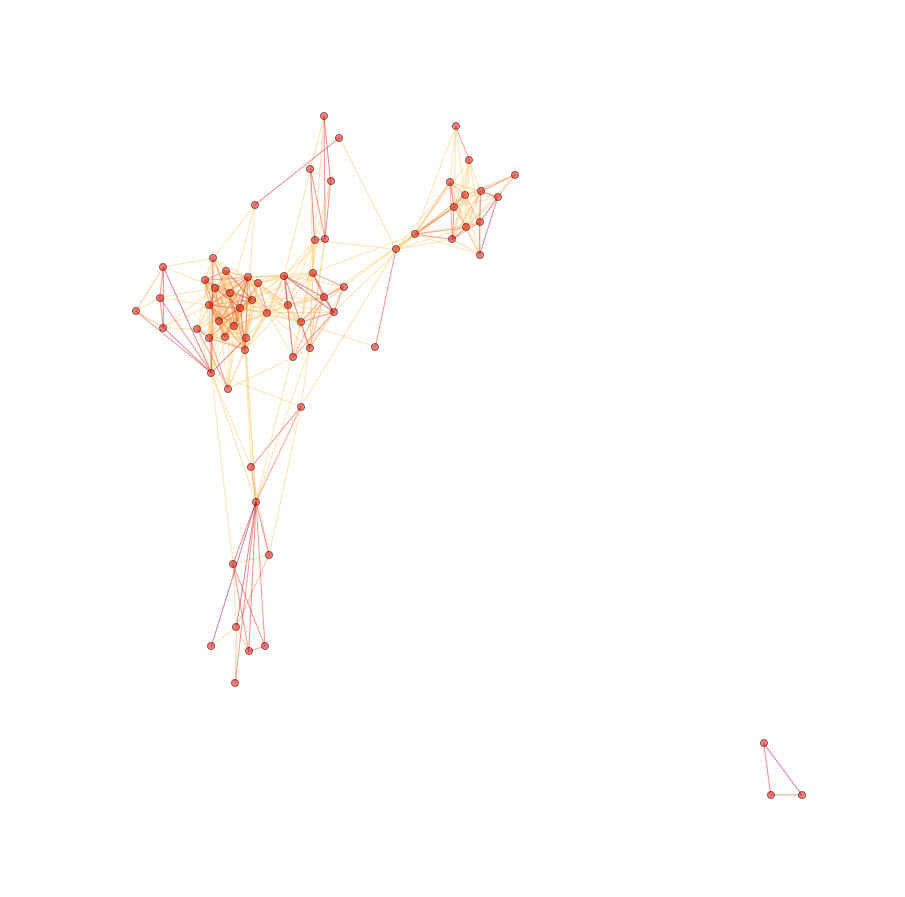

In [23]:
plt.figure(figsize=(12,12))

H=gc_list[0].copy()
t=max([ d['w'] for (u,v,d) in H.edges(data=True)])
print t
l=50
V=[v for v in H.nodes() if any([H[u][v]['w']>=l for u in H.neighbors(v)])]
H=H.subgraph(V)
print nx.is_connected(H)
print H.number_of_nodes()
nx.draw(H,edge_cmap=plt.cm.YlOrRd,edge_vmin=0,edge_vmax=1,edge_color=[ max([float(math.log(d['w']))/math.log(t),0.3]) for (u,v,d) in H.edges(data=True)],node_size=50,alpha=0.5)

[]

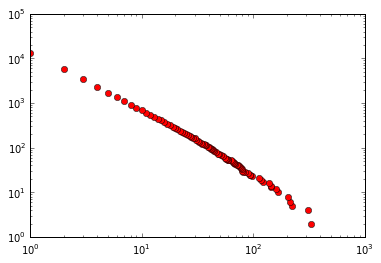

In [110]:
H=gc_list[0].copy()
t=max([ d['w'] for (u,v,d) in H.edges(data=True)])
df_node_level=pd.DataFrame([[v,max([H[u][v]['w'] for u in H.neighbors(v)])] for v in H.nodes()])
df_node_level.columns=['tender_id','max_cobid_neighbor']
number_of_cobidders=df_node_level.groupby('max_cobid_neighbor').size().sort_index(ascending=False).cumsum()

x=number_of_cobidders.index.tolist()
y=number_of_cobidders.tolist()
plt.plot(x,y,'or')
plt.loglog()


Calculate relative gap between cobidders.

In [30]:
tdf=df[df.bidders.apply(lambda x: x!=[])][['tender_registration_number','bidders','bidders_lowest_bids']]
tdf.columns=[0,1,2]

In [31]:
tdf=df[df.bidders.apply(lambda x: x!=[])][['tender_registration_number','bidders','bidders_lowest_bids']]
tdf.columns=[0,1,2]
tdf=pd.DataFrame([\
tdf\
      .apply(lambda row: [row[0]]*len(row[1]),axis=1)\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist(),\
    tdf[1]\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist(),\
    tdf[2]\
      .apply(pd.Series).transpose()\
      .unstack()\
      .reset_index(drop=True)\
      .dropna()\
      .tolist()
 ]).transpose().set_index(0)

In [217]:
tdf.head(10)

,1,2
0,,
SPA130012785,204545572,22110
SPA130012786,406030370,2792
SPA130012787,204544635,4723
SPA130012788,204544635,4844
SPA130012781,202886172,2700
SPA130012781,404880483,2299
SPA130012781,404924427,2300
SPA130012782,205043237,7198
SPA130012782,202223147,7199


In [32]:
edgelist=tdf.join(tdf,lsuffix="x",rsuffix="y")
edgelist=edgelist[edgelist["1x"]<edgelist["1y"]]

In [33]:
edgelist=edgelist.groupby(['1x','1y']).apply(lambda x: np.mean((np.maximum(np.array(x['2x']),np.array(x['2y']))-np.minimum(np.array(x['2x']),np.array(x['2y'])))/np.maximum(np.array(x['2x']),np.array(x['2y']))))
edgelist=edgelist.reset_index()
edgelist.sort_values(by=0,ascending=False,inplace=True)
edgelist.columns=["s","t","w"]
edgelist.head(5)

,s,t,w
50343,200259344,401967270,0.993648
50342,200259344,211359448,0.993648
95697,245563698,61002001021,0.989861
91700,236048898,33001006828,0.981214
39051,01012000877,33001006828,0.980263


In [34]:
G=nx.from_pandas_dataframe(edgelist,"s","t",["w"])
gc_list=list(nx.connected_component_subgraphs(G))
print [H.number_of_nodes() for H in gc_list]

[12946, 2, 2, 2, 2, 27, 5, 2, 2, 2, 2, 2, 3, 3, 3, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 4, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [226]:
tenders_prop=pd.DataFrame.from_dict(nx.clustering(G,weight='w'),orient='index')
#tenders_prop=tenders_prop.join(pd.DataFrame.from_dict(nx.pagerank(G,weight='w'),orient='index'),lsuffix='x',rsuffix='y')
tenders_prop.columns=['cluster_coeff']

(array([  1.57100000e+04,   4.27800000e+03,   3.59200000e+03,
          3.53400000e+03,   3.65400000e+03,   3.73300000e+03,
          3.69200000e+03,   3.85300000e+03,   3.81700000e+03,
          3.85800000e+03,   3.86200000e+03,   3.78500000e+03,
          3.71100000e+03,   3.44800000e+03,   3.32500000e+03,
          3.28200000e+03,   3.05600000e+03,   2.81500000e+03,
          2.79600000e+03,   2.61100000e+03,   2.51800000e+03,
          2.32500000e+03,   2.19800000e+03,   2.09300000e+03,
          1.94800000e+03,   1.90700000e+03,   1.70500000e+03,
          1.59200000e+03,   1.59400000e+03,   1.45400000e+03,
          1.33800000e+03,   1.32200000e+03,   1.23200000e+03,
          1.12400000e+03,   1.03900000e+03,   9.77000000e+02,
          8.90000000e+02,   8.34000000e+02,   7.97000000e+02,
          7.48000000e+02,   7.17000000e+02,   6.33000000e+02,
          5.74000000e+02,   5.21000000e+02,   5.10000000e+02,
          4.66000000e+02,   3.79000000e+02,   3.77000000e+02,
        

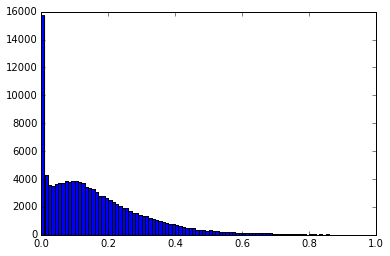

In [112]:
plt.hist(np.array([ d['w'] for (u,v,d) in G.edges(data=True)]), bins=100,range=(0,1))

0.993647798742
False
16


/home/bencs/.anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/bencs/.anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


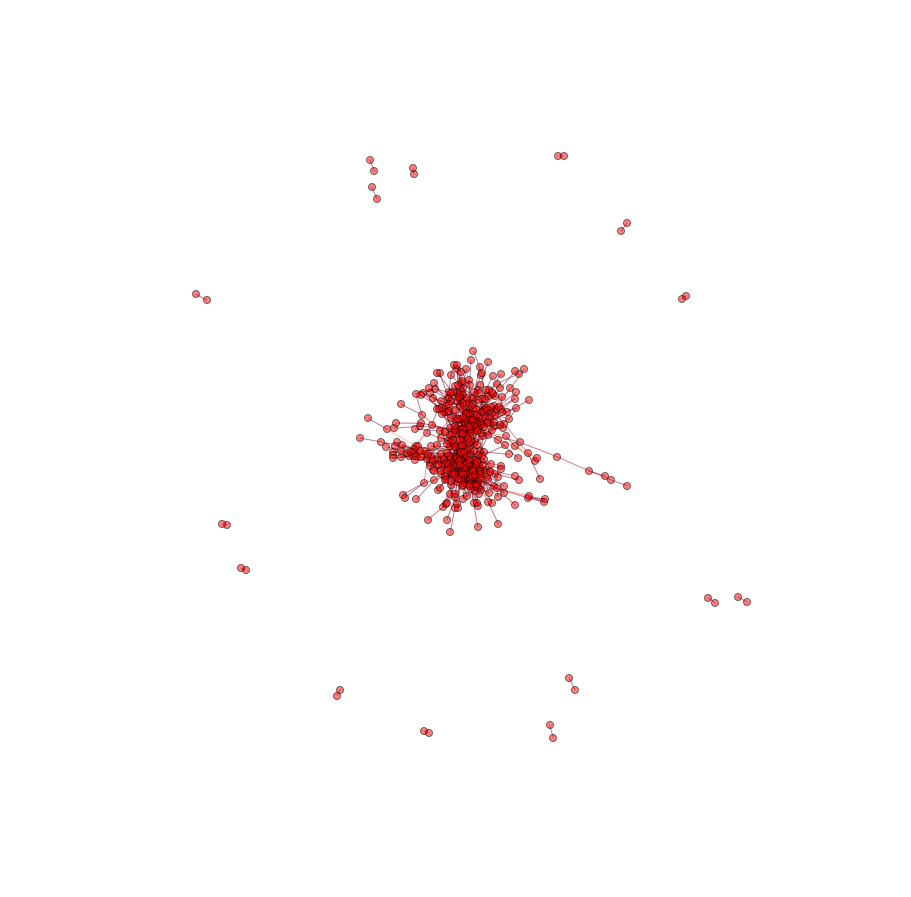

In [37]:
plt.figure(figsize=(12,12))

H=gc_list[0].copy()
t=max([ d['w'] for (u,v,d) in H.edges(data=True)])
print t
l=10**(-7)
V=[v for v in H.nodes() if any([H[u][v]['w']<=l for u in H.neighbors(v)])]
H=H.subgraph(V)
print nx.is_connected(H)
print nx.number_connected_components(H)
nx.draw(H,edge_cmap=plt.cm.YlOrRd,edge_vmin=0,edge_vmax=1,edge_color=[ 1-d['w'] for (u,v,d) in H.edges(data=True)],node_size=50,alpha=0.5)

[]

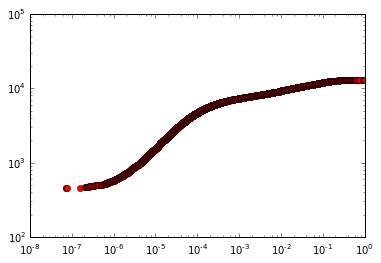

In [128]:
H=gc_list[0].copy()
t=max([ d['w'] for (u,v,d) in H.edges(data=True)])
df_node_level=pd.DataFrame([[v,min([H[u][v]['w'] for u in H.neighbors(v)])] for v in H.nodes()])
df_node_level.columns=['tender_id','min_cobid_neighbor']
number_of_cobidders=df_node_level.groupby('min_cobid_neighbor').size().sort_index(ascending=True).cumsum()

x=number_of_cobidders.index.tolist()
y=number_of_cobidders.tolist()
plt.plot(x,y,'or')
plt.loglog()

Act/est vs cluster_coef and pagerank

In [57]:
tenders_prop=pd.DataFrame.from_dict(nx.clustering(G),orient='index')
tenders_prop=tenders_prop.join(pd.DataFrame.from_dict(nx.pagerank(G),orient='index'),lsuffix='x',rsuffix='y')
tenders_prop=tenders_prop.join(pd.DataFrame.from_dict(nx.clustering(G,weight='w'),orient='index'),lsuffix='x',rsuffix='y')
tenders_prop=tenders_prop.join(pd.DataFrame.from_dict(nx.pagerank(G,weight='w'),orient='index'),lsuffix='x',rsuffix='y')

tenders_prop.columns=['cluster_coeff','pagerank','cluster_coeff_w','pagerank_w']

In [58]:
temp=pd.DataFrame(df[['winner_code','estimated_value','contract_value']][~pd.isnull(df.winner_code)].
                  groupby('winner_code').
                  apply(lambda x: np.mean(np.array(x['contract_value'])/np.array(x['estimated_value'])) if x['contract_value'].size>2 else np.nan ))
temp.columns=['act_est']
tenders_prop=pd.concat([tenders_prop, temp], axis=1)

In [10]:
df['winner_code','contract_value'].groupby('winner_code').size()

KeyError: ('winner_code', 'contract_value')

In [59]:
tenders_prop

,cluster_coeff,pagerank,cluster_coeff_w,pagerank_w,act_est
1870856.0,1.000000,0.000032,0.003139,0.000024,NaN
80646132.0,1.000000,0.000025,0.004869,0.000021,0.699279
100147609.0,1.000000,0.000040,0.003064,0.000033,NaN
102104054.0,0.563218,0.000074,0.001922,0.000058,NaN
104457785.0,1.000000,0.000032,0.004139,0.000024,NaN
104502147.0,0.577075,0.000073,0.001888,0.000062,NaN
104542791.0,1.000000,0.000044,0.003177,0.000036,NaN
105057456.0,1.000000,0.000044,0.003177,0.000036,NaN
105085791.0,1.000000,0.000049,0.004303,0.000033,NaN
106315522.0,1.000000,0.000027,0.003304,0.000023,NaN


[]

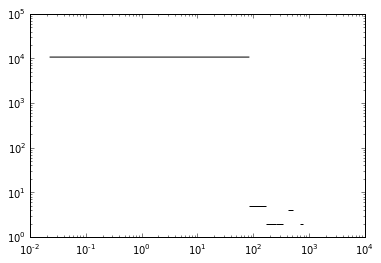

In [40]:
_=plt.hist(tenders_prop[~pd.isnull(tenders_prop.act_est)].act_est,bins=100)
plt.loglog()

[]

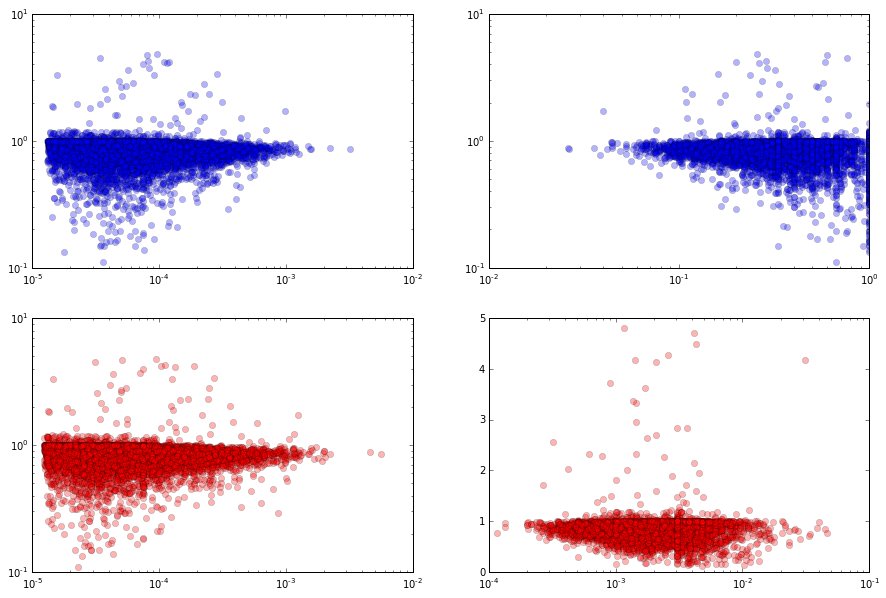

In [60]:
fig, axes =plt.subplots(2,2,figsize=(15,10))
mask=~pd.isnull(tenders_prop.act_est) & ~pd.isnull(tenders_prop.cluster_coeff) & (tenders_prop.act_est<5) & (tenders_prop.act_est>0.1)
axes[0][0].plot(np.array(tenders_prop.pagerank[mask]),np.array(tenders_prop.act_est[mask]), 'bo',alpha=0.3)
axes[0][0].loglog()
axes[0][1].plot(np.array(tenders_prop.cluster_coeff[mask]),np.array(tenders_prop.act_est[mask]), 'bo',alpha=0.3)
axes[0][1].loglog()
axes[1][0].plot(np.array(tenders_prop.pagerank_w[mask]),np.array(tenders_prop.act_est[mask]), 'ro',alpha=0.3)
axes[1][0].loglog()
axes[1][1].plot(np.array(tenders_prop.cluster_coeff_w[mask]),np.array(tenders_prop.act_est[mask]), 'ro',alpha=0.3)
axes[1][1].semilogx()

In [64]:
np.corrcoef(np.array(tenders_prop.cluster_coeff_w[mask]),np.array(tenders_prop.act_est[mask]))

array([[ 1.        , -0.07099232],
       [-0.07099232,  1.        ]])

How many procurements are there overall?

In [32]:
df.procurring_entity_id.unique().size

2386

[]

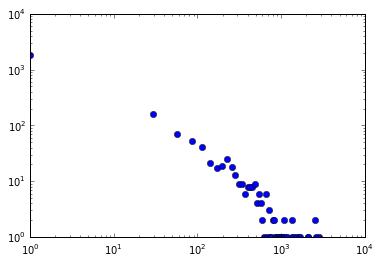

In [38]:
y,x=np.histogram(np.array(df.groupby("procurring_entity_id").size()),bins=100)
plt.plot(x[:-1],y,'o')
plt.loglog()

The procurements with the most tenders.

In [40]:
tender_size_list=df.groupby("procurring_entity_id").size()
tender_size_list.sort(ascending=False)

/home/bencs/.anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


How tenders came in daily for this procurement.

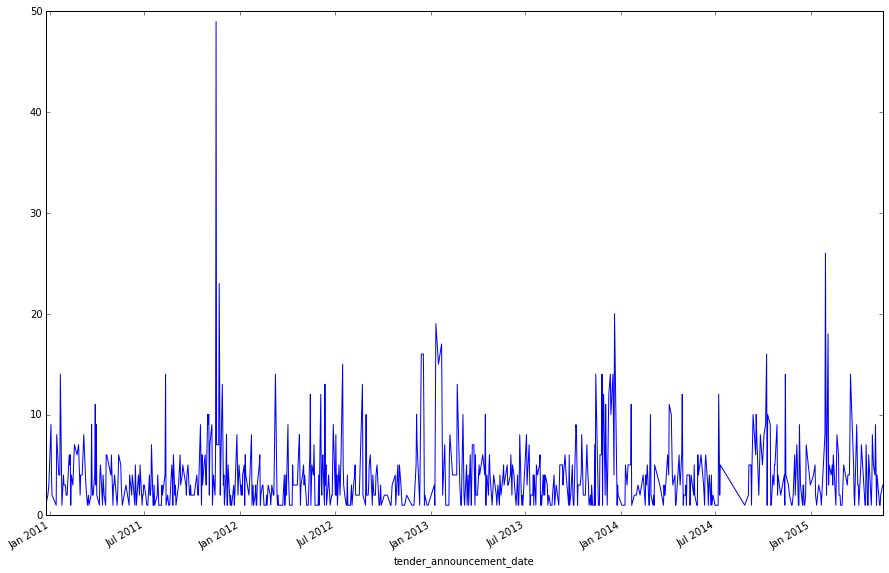

In [41]:
df[df.procurring_entity_id==tender_size_list.index[0]].\
    groupby("tender_announcement_date").\
    size().\
    plot(kind="line",figsize=(15,10))

Same for the second most tenders.

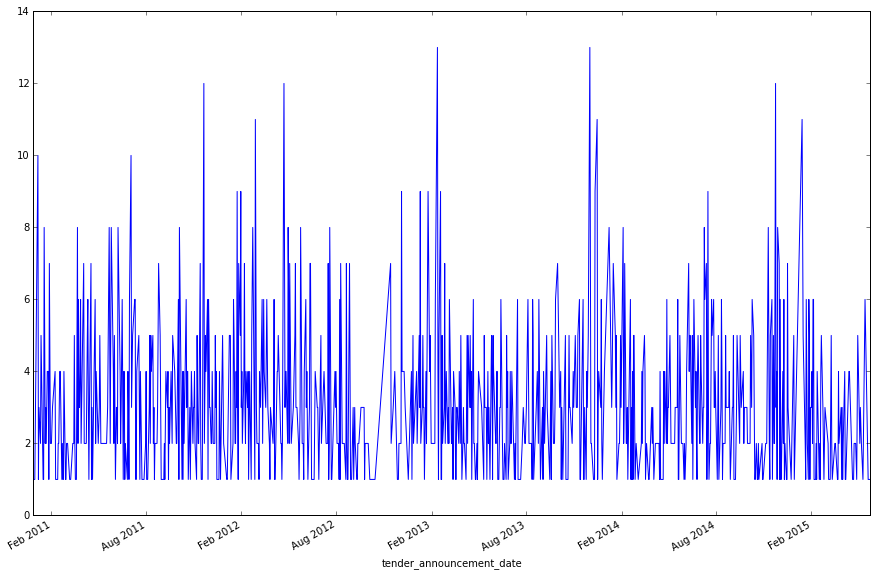

In [42]:
df[df.procurring_entity_id==tender_size_list.index[1]].\
    groupby("tender_announcement_date").\
    size().\
    plot(kind="line",figsize=(15,10))

Possible questions:
- How many days did the biddings last?
- What was the number of bidders?
- How did he price change during the bidding period?
- What was the deadline and when was the winner announced?
- Drawing a co-bidding network.
- Time period between first bid and announcement.

In [44]:
print "\n".join(df.currency[~pd.isnull(df.currency)].unique())

ლარი
აშშ
ევრო


In [45]:
print "\n".join(map(lambda text: trans.translate(text,"en"),df.currency[~pd.isnull(df.currency)].unique()))

NameError: global name 'trans' is not defined